In [2]:
import sys
import os

# Add the build directory to Python path
build_dir = os.path.abspath('../lib')
sys.path.insert(0, build_dir)

# Add the data directory to Python path
data_dir = os.path.abspath('../data')
sys.path.insert(0, data_dir)

import pandas as pd
import numpy as np

import sorters
import probes

import list_generators as lg

In [3]:
probe_list = probes.list_probes()
sort_list = sorters.list_sorters()

In [6]:
sizes = [1, 10, 100, 1000, 10000, 100000]

dataset = []
for size in sizes:
    baselist = lg.generate_list(size)
    randomlist = lg.randomize_list(baselist)
    dataset.append(randomlist)

In [ ]:
probe_times = {}
sort_times = {}

for arr in dataset:
    for probe in probe_list:
        t = probes.benchmark_probe_by_name(probe, arr)
        probe_times.setdefault(probe, []).append(t)
    
    for sorter in sort_list:
        t = sorters.benchmark_sorter(sorter, arr)
        sort_times.setdefault(sorter, []).append(t)

Probe times: [0.000584, 0.00025, 0.000708, 0.003833, 0.048667, 0.174917]
Probe times: [4.2e-05, 0.000667, 0.0025, 0.018166, 0.1495, 1.064333]
Probe times: [4.2e-05, 0.001084, 0.004792, 0.052875, 0.630209, 6.146083]
Probe times: [4.1e-05, 0.000375, 0.002333, 0.025167, 0.986834, 5.233333]
Probe times: [4.2e-05, 0.00125, 0.006208, 0.071583, 1.100917, 7.480417]
Probe times: [4.2e-05, 0.000667, 0.008208, 0.103291, 1.528042, 15.345417]
Probe times: [4.1e-05, 8.3e-05, 0.000458, 0.003917, 0.031542, 0.214541]
Probe times: [8.3e-05, 0.000917, 0.008375, 0.10475, 1.483583, 14.842292]
Probe times: [0.000208, 0.0005, 0.003416, 0.022625, 0.221375, 1.57875]
Probe times: [4.2e-05, 0.000166, 0.000542, 0.004084, 0.034584, 0.228666]
Probe times: [4.1e-05, 0.000625, 0.002792, 0.022125, 0.232416, 1.457041]

Sorter times: [0.000416, 0.000334, 0.005583, 0.066667, 0.653291, 5.029]
Sorter times: [0.000208, 0.00125, 0.005625, 0.059208, 0.6655, 8.070958]
Sorter times: [0.00025, 0.00025, 0.000583, 0.003209, 0.0247

In [14]:
for probe in probe_times:
    print("Probe times:", probe_times.get(probe))
print()
for sorter in sort_times:
    print("Sorter times:", sort_times.get(sorter))

Probe times: [0.000584, 0.00025, 0.000708, 0.003833, 0.048667, 0.174917]
Probe times: [4.2e-05, 0.000667, 0.0025, 0.018166, 0.1495, 1.064333]
Probe times: [4.2e-05, 0.001084, 0.004792, 0.052875, 0.630209, 6.146083]
Probe times: [4.1e-05, 0.000375, 0.002333, 0.025167, 0.986834, 5.233333]
Probe times: [4.2e-05, 0.00125, 0.006208, 0.071583, 1.100917, 7.480417]
Probe times: [4.2e-05, 0.000667, 0.008208, 0.103291, 1.528042, 15.345417]
Probe times: [4.1e-05, 8.3e-05, 0.000458, 0.003917, 0.031542, 0.214541]
Probe times: [8.3e-05, 0.000917, 0.008375, 0.10475, 1.483583, 14.842292]
Probe times: [0.000208, 0.0005, 0.003416, 0.022625, 0.221375, 1.57875]
Probe times: [4.2e-05, 0.000166, 0.000542, 0.004084, 0.034584, 0.228666]
Probe times: [4.1e-05, 0.000625, 0.002792, 0.022125, 0.232416, 1.457041]

Sorter times: [0.000416, 0.000334, 0.005583, 0.066667, 0.653291, 5.029]
Sorter times: [0.000208, 0.00125, 0.005625, 0.059208, 0.6655, 8.070958]
Sorter times: [0.00025, 0.00025, 0.000583, 0.003209, 0.0247

In [ ]:
# Compute average times for each probe
avg_probe_times = {}
for probe, times in probe_times.items():
    avg_probe_times[probe] = sum(times) / len(times) if times else 0

# Compute average times for each sorter
avg_sort_times = {}
for sorter, times in sort_times.items():
    avg_sort_times[sorter] = sum(times) / len(times) if times else 0

# Print out average times
print("Average probe times (ms):")
for probe, avg_time in avg_probe_times.items():
    print(f"  {probe}: {avg_time:.2f}")

print("\nAverage sorter times (ms):")
for sorter, avg_time in avg_sort_times.items():
    print(f"  {sorter}: {avg_time:.2f}")

print("\nRatio of average probe time to average sorter time:")
for probe, avg_probe in avg_probe_times.items():
    for sorter, avg_sort in avg_sort_times.items():
        ratio = avg_probe / avg_sort if avg_sort != 0 else float('inf')
        print(f"  {probe} / {sorter}: {ratio:.2f}")

Average probe times (ms):
  dis: 0.04
  enc: 0.21
  exc: 1.14
  ham: 1.04
  inv: 1.44
  max: 2.83
  mono: 0.04
  osc: 2.74
  rem: 0.30
  runs: 0.04
  sus: 0.29

Average sorter times (ms):
  adaptive_shivers_sort: 0.96
  cartesian_tree_sort: 1.47
  counting_sort: 0.04
  heap_sort: 0.58
  insertion_sort: 107.53
  mel_sort: 1.51
  merge_sort: 0.73
  poplar_sort: 1.04
  quick_sort: 0.73
  quick_merge_sort: 0.77
  ska_sort: 0.20
  slab_sort: 3.03
  smooth_sort: 2.15
  spin_sort: 0.71
  splay_sort: 3.98
  spread_sort: 0.29
  std_sort: 0.66
  tim_sort: 0.94

Ratio of average probe time to average sorter time:
  dis / adaptive_shivers_sort: 0.04
  dis / cartesian_tree_sort: 0.03
  dis / counting_sort: 1.03
  dis / heap_sort: 0.07
  dis / insertion_sort: 0.00
  dis / mel_sort: 0.03
  dis / merge_sort: 0.05
  dis / poplar_sort: 0.04
  dis / quick_sort: 0.05
  dis / quick_merge_sort: 0.05
  dis / ska_sort: 0.19
  dis / slab_sort: 0.01
  dis / smooth_sort: 0.02
  dis / spin_sort: 0.05
  dis / spla

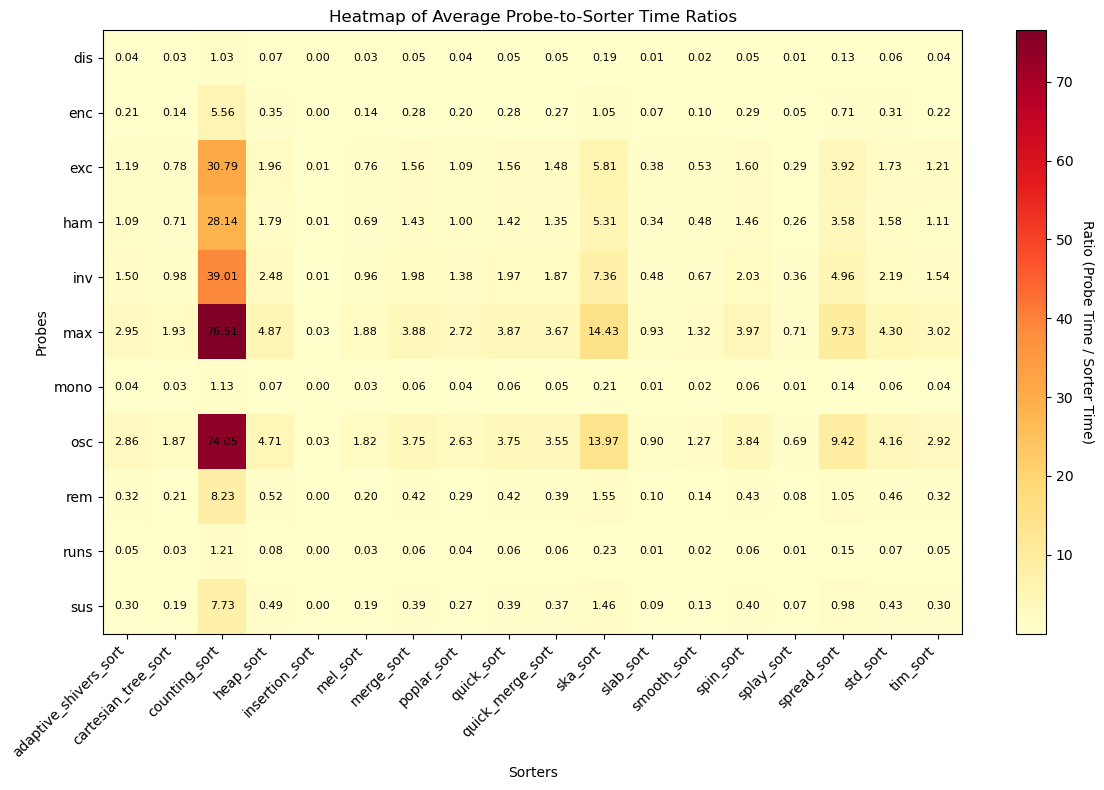

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assume avg_probe_times and avg_sort_times have been computed earlier
probe_names = list(avg_probe_times.keys())
sorter_names = list(avg_sort_times.keys())

# Create a 2D array (matrix) of ratios:
ratio_matrix = np.array([
    [avg_probe_times[probe] / avg_sort_times[sorter] if avg_sort_times[sorter] != 0 else 0 
     for sorter in sorter_names] 
    for probe in probe_names
])

# Optionally, set a fixed color scale or compute from data:
vmin = np.nanmin(ratio_matrix)
vmax = np.nanmax(ratio_matrix)

# Set up the plot
plt.figure(figsize=(12, 8))
# Use a bright colormap such as "YlOrRd"
cmap = plt.get_cmap('YlOrRd')
im = plt.imshow(ratio_matrix, cmap=cmap, aspect='auto', interpolation='nearest', vmin=vmin, vmax=vmax)

# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Ratio (Probe Time / Sorter Time)', rotation=270, labelpad=15)

# Set axis tick labels
plt.xticks(ticks=np.arange(len(sorter_names)), labels=sorter_names, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(probe_names)), labels=probe_names)

plt.xlabel("Sorters")
plt.ylabel("Probes")
plt.title("Heatmap of Average Probe-to-Sorter Time Ratios")

# Annotate each cell with its ratio value for clarity
for i in range(ratio_matrix.shape[0]):
    for j in range(ratio_matrix.shape[1]):
        plt.text(j, i, f"{ratio_matrix[i, j]:.2f}", ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()
